# Naive Bayes i Classificació


En aquest tercer lliurament es programarà un classificador, que donada una *piulada*, la categoritzarà en una de les possibles classes. En aquesta ocasió, implementareu un classificador amb *piulades* relacionades amb el *cyber bullying*.

Recordeu que l'objectiu principal d'aquesta pràctica és desenvolupar un classificador amb una *accuracy* alta. 


**Què s’ha de fer?**

Volem classificar *piulades* segons a quin tipus de *cyber bullying* pertanyen. Així doncs, a partir de tots les *piulades* que tenim, crearem un vector de característiques que ens descrigui cadascuna. A continuació desenvoluparem un classificador probabilístic del tipus **Naive Bayes** que ens permeti identificar a quina classe de *cyber bullying* pertany una *piulada* donada, segons les característiques disenyades.


**Quina és la idea del sistema de classificació que s’ha de desenvolupar?**

El classificador és un concepte de l'aprenentatge automàtic supervisat. L'objectiu del classificador és donat un vector de característiques que descriuen els objectes que es volen classificar indicar a quina categoria o classe pertanyen d'entre un conjunt predeterminat. 

El procés de classificació consta de dues parts: 

+ el procés d'aprenentatge i 
+ el procés d'explotació o testeig. 

El procés d'aprenentatge rep exemples de parelles $(x,y)$ on $x$ són les característiques, usualment representades per nombres reals, i $y$ és la categoria a la que pertanyen. 
Aquest conjunt se'l coneix com a conjunt d'entrenament i ens servirà per trobar una funció $\hat{y}=f(x)$ que donada una $x$ aconsegueixi que $\hat{y}$ sigui semblant $y$. 

Per altra banda el procés de testeig aplica la funció $f(x)$ apresa a l'entrenament a a dades no presents en el conjunt d'aprenentatge per avaluar el classificador.

**Classificació i llenguatge natural**

La descripció dels exemples en característiques és el punt més crític de tot sistema d'aprenentatge automàtic. 
Una de les representacions més simples per tal de descriure un text és la representació ["bag-of-words"](https://en.wikipedia.org/wiki/Bag-of-words_model).

Aquesta representació converteix un text en un vector de $N$ paraules. 
Primer haurem de seleccionar el conjunt d'$N$ paraules que volem fer servir. Després, per cada paraula comptar quants cops apareix en el text. 

Una versió alternativa i més simple d'aquest procés pot ser simplement indicar al vector si una determinada paraula apareix o no en el text.

## Abans de començar


**\+ Durant la pràctica, solament es podran fer servir les següents llibreries**:

`Pandas, Numpy, Re` i `NLTK`

Python té un paquet integrat anomenat ["re"](https://www.w3schools.com/python/python_regex.asp), que es pot utilitzar per treballar amb expressions regulars. És molt aconsellable fer servir aquest paquet per processar les paraules.

**\+ No es poden modificar les definicions de les funcions donades, ni canviar els noms de les variables i paràmetres ja donats**

Això no implica però que els hàgiu de fer servir. És a dir, que la funció tingui un paràmetre anomenat `df` no implica que l'hàgiu de fer servir, si no ho trobeu convenient.

**\+ En les funcions, s'especifica que serà i de quin tipus cada un dels paràmetres, cal respectar-ho**

Per exemple (ho posarà en el pydoc de la funció), `df` sempre serà indicatiu del `Pandas.DataFrame` de les dades. Durant els testos, els paràmetres (i específicament `df`) no contindran les mateixes dades que en aquest notebook, si bé si seran del mateix tipus! Per tant, no us refieu de què tinguin, per exemple, el mateix nombre de files.

## Les dades

El 15 d'Abril de 2020, UNICEF va llançar una alarma com a resposta de l'augment de risc de *cyber bullying* durant la pandèmia COVID-19. 

Les estadístiques són prou alarmants: un 36.5% dels estudiants de l'escola fins a l'institut s'han sentit víctimes del *cyber bullying* i un 87% n'han estat testimonis, amb efectes que van des d'una disminució de resultats acadèmics fins a pensaments suïcides.

Amb l'objectiu d'ajudar a l'analisis de la situació, s'ha construit un dataset que conté més de 47000 *piulades* etiquetades d'acord amb la classe de *cyber bullying* que s'està donant:

1. `age`;
2. `ethnicity`;
3. `gender`;
4. `religion`;
5. `other type of cyberbullying`;
6. `not cyberbullying`

Les dades han estat balancejades per tal de contenir aproximadament 8000 mostres de cada classe.

# Preparar les dades

## Lectura de les dades

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('data/cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [3]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

## Preparació del dataset

Dividim les *piulades* en un conjunt d'entrenament, *train*, i en un conjunt de validació, *test*, per tal de poder entrenar i validar el nostre model de classificació.

In [4]:
from sklearn.model_selection import train_test_split

df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

Com les dades estaven balancejades originalment, podem observar que la distribució de cadascuna de les classes es manté:

In [5]:
df_tweets_train['cyberbullying_type'].value_counts()

cyberbullying_type
gender                 6431
age                    6430
religion               6395
ethnicity              6360
not_cyberbullying      6338
other_cyberbullying    6199
Name: count, dtype: int64

In [6]:
df_tweets_test['cyberbullying_type'].value_counts()

cyberbullying_type
other_cyberbullying    1624
not_cyberbullying      1607
religion               1603
ethnicity              1601
age                    1562
gender                 1542
Name: count, dtype: int64

# Implementació

Dividirem el notebook en 3 seccions que es complementen una a l'altra:

1. Anàlisi exploratòria de les dades: Informació bàsica sobre les *piulades*.
2. Processament de les dades: Creació d'un vector de característiques a partir de les *piulades*.
3. Desenvolupament d'un classificador *Naive Bayes*. 

### 1. Anàlisis de dades

El primer que haurem de fer és analitzar les dades per veure una mica com són. El que us proposem és fer una sèrie de visualitzacions per observar les dades, com ara:

* el nombre de *piulades* que s'estan dirigint a una persona en concret
* el nombre de  *hashtags* que hi ha a cada categoria de *piulades*
* el nombre de  *piulades* que hi ha de cada categoria de *piulades*
* el nombre de  *piulades* de la categoria `not_cyberbullying` que es dirigeixen a un usuari vs totes les altres categories
* altres coses que penseu que poden ser rellevants.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
41393,Those amendments are all 150+ years old. Repub...,ethnicity
296,"How come it is that the minute I get home, my ...",not_cyberbullying
23183,@Qoloob4 @Vandaliser @sajid_fairooz @IsraeliRe...,religion
20087,The left has now become a real and threatening...,religion
6416,@_qg @Colonel_Shami2 Yawn.,not_cyberbullying


#### EXERCICI 1: 

* Quantes *piulades* estan dirigides a un usuari concret? Diem que una piulada va dirigida a una persona en concret si contenen el patró ``@usuari``. 

[Restriccions](https://help.twitter.com/en/managing-your-account/change-twitter-handle) que imposa X sobre el patró:
+ Nomes són valids aquells patrons amb caràcters alfanumèrics ``[A-z 0-9]`` i el caràcter ``_``
+ Els patrons han de començar per ``@`` i han de tenir més de 4 i menys de 16 caràcters.

En aquest exercici és extremadament útil l'ús del mòdul ``re``.

In [9]:
REGEX_user = r"@[A-Za-z0-9_]{5,15}" 
# Comienza estrictamente por @, contiene caracteres alfanuméricos y _ y tiene una longitud de 5 a 15
# los users no pueden tener caracteres especiales en el nombre

REGEX_hashtag = r"#[a-zA-ZÀ-ÿ0-9_]+"  
REGEX_not_hashtag = r"#[^a-zA-ZÀ-ÿ0-9_]+"  
#REGEX_hashtag = r"#[a-zA-Z0-9_]+"  
#REGEX_not_hashtag = r"#[^a-zA-Z0-9_]+"  
# version con regex en diferentes idiomas ( À-ÿ contiene la mayoria de caracteres especiales de otros idiomas )



In [10]:
# El vostre codi aquí
import re

# Expresió regular

df_counts = df[df['tweet_text'].str.contains(REGEX_user , regex= True)].shape[0]  # resultado 17901
print(f"Hay {df_counts} tweets dedicados a users concretos")


Hay 17901 tweets dedicados a users concretos


+ Quants *hashtags* ``#`` hi ha a cada categoria de *piulades*?

Compteu els ``#`` que vagin seguits d'alguna lletra o nombre ja que, com veiem a la [normativa](https://help.twitter.com/en/using-twitter/how-to-use-hashtags) de X, els ``#`` no poden contenir cap mena de signe de puntuació.

In [11]:
# El vostre codi aquí

# Filtrar por categoria
df_not_cb = df[ df['cyberbullying_type'] == 'not_cyberbullying']
df_other_cb = df[ df['cyberbullying_type'] == 'other_cyberbullying']
df_religion_cb = df[ df['cyberbullying_type'] == 'religion']
df_age_cb = df[ df['cyberbullying_type'] == 'age']
df_gender_cb = df[ df['cyberbullying_type'] == 'gender']
df_ethnicity_cb = df[ df['cyberbullying_type'] == 'ethnicity']

# Contar hashtags por categoría
not_cb_hashtags = df_not_cb['tweet_text'].str.count(REGEX_hashtag).sum()
other_cb_hashtags = df_other_cb['tweet_text'].str.count(REGEX_hashtag).sum()
religion_cb_hashtags = df_religion_cb['tweet_text'].str.count(REGEX_hashtag).sum()
age_cb_hashtags = df_age_cb['tweet_text'].str.count(REGEX_hashtag).sum()
gender_cb_hashtags = df_gender_cb['tweet_text'].str.count(REGEX_hashtag).sum()
ethnicity_cb_hashtags = df_ethnicity_cb['tweet_text'].str.count(REGEX_hashtag).sum()

# Imprimir resultados
print(f"Nombre de hashtags a 'not_cyberbullying': {not_cb_hashtags}")
print(f"Nombre de hashtags a 'other_cyberbullying': {other_cb_hashtags}")
print(f"Nombre de hashtags a 'religion': {religion_cb_hashtags}")
print(f"Nombre de hashtags a 'age': {age_cb_hashtags}")
print(f"Nombre de hashtags a 'gender': {gender_cb_hashtags}")
print(f"Nombre de hashtags a 'ethnicity': {ethnicity_cb_hashtags}")

Nombre de hashtags a 'not_cyberbullying': 3273
Nombre de hashtags a 'other_cyberbullying': 1627
Nombre de hashtags a 'religion': 1798
Nombre de hashtags a 'age': 728
Nombre de hashtags a 'gender': 2691
Nombre de hashtags a 'ethnicity': 1112


+ Fes un histograma que representi aquesta distribució?

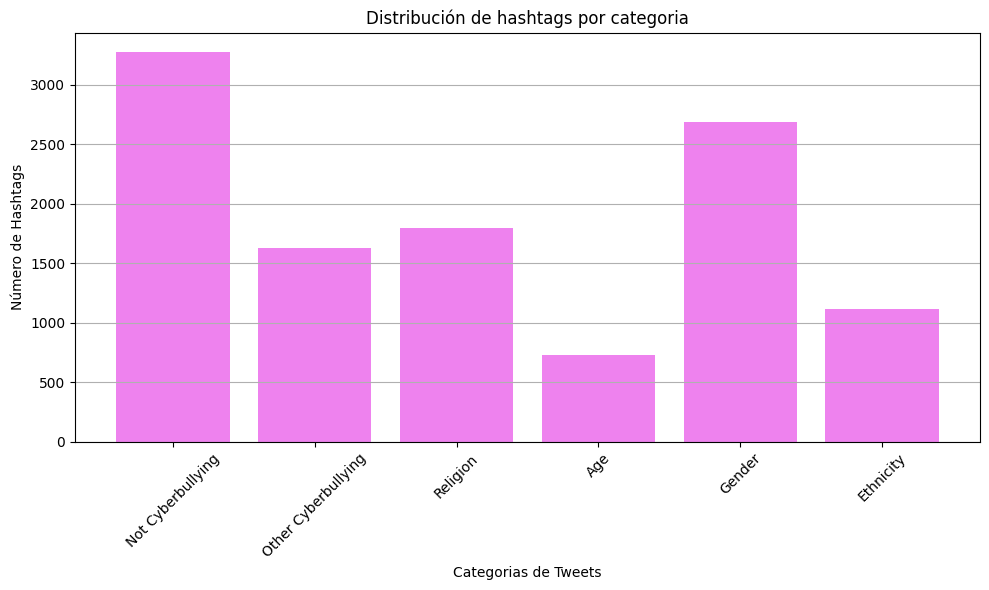

In [12]:
# El vostre codi aquí

# histograma por cada tipo de ciber bulling
categories = [
    'Not Cyberbullying',
    'Other Cyberbullying',
    'Religion',
    'Age',
    'Gender',
    'Ethnicity'
]

hashtag_counts = [
    not_cb_hashtags,
    other_cb_hashtags,
    religion_cb_hashtags,
    age_cb_hashtags,
    gender_cb_hashtags,
    ethnicity_cb_hashtags
]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(categories, hashtag_counts, color='violet')
plt.xlabel('Categorias de Tweets')
plt.ylabel('Número de Hashtags')
plt.title('Distribución de hashtags por categoria')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

+ Comproveu a continuació quantes vegades hi ha un ús invàlid dels ``#``, per exemple ``##`` o ``#@``, on, si no tinguessim en compte la restriccio imposada, hauriem contat 2 ``#`` a ``##`` o 1 ``#`` a ``#@``, quan en realitat son 1 i 0 respectivament.

In [13]:
# El vostre codi aquí

# comprobar uso invalido de hashtags

# tweets con hashtags mal utilizados
df_counts_not_a_hasttag = df[df['tweet_text'].str.contains(REGEX_not_hashtag , regex= True)].shape[0]  
print(f"Hay {df_counts_not_a_hasttag} tweets con hashtags incorrectos")

# tweets con hashtags bien utilizados
df_counts_hasttag = df[df['tweet_text'].str.contains(REGEX_hashtag , regex= True)].shape[0]  
print(f"Hay {df_counts_hasttag} tweets con hashtags correctos")

# Contar el número total de hashtags inválidos
df_counts_not_a_hasttag = df[df['tweet_text'].str.contains(REGEX_not_hashtag, regex=True)].shape[0]
print(f"Hay {df_counts_not_a_hasttag} hashtags incorrectos")

# Contar el número total de hashtags correctos
total_valid_hashtags = df['tweet_text'].str.count(REGEX_hashtag).sum()  # Sumar todos los hashtags válidos
print(f"Hay {total_valid_hashtags} hashtags correctos")

Hay 80 tweets con hashtags incorrectos
Hay 6956 tweets con hashtags correctos
Hay 80 hashtags incorrectos
Hay 11229 hashtags correctos


+ Quantes *piulades* vàlides hi ha de cada categoria?

In [14]:
# El vostre codi aquí

# Contar piulades válidas por categoria
numero_tweets_not_cb                    = df_not_cb[df_not_cb['tweet_text'].str.contains(REGEX_hashtag, regex=True)].shape[0]
numero_tweets_other_cb                  = df_other_cb[df_other_cb['tweet_text'].str.contains(REGEX_hashtag, regex=True)].shape[0]
numero_tweets_religion_cb               = df_religion_cb[df_religion_cb['tweet_text'].str.contains(REGEX_hashtag, regex=True)].shape[0]
numero_tweets_age_cb                    = df_age_cb[df_age_cb['tweet_text'].str.contains(REGEX_hashtag, regex=True)].shape[0]
numero_tweets_gender_cb                 = df_gender_cb[df_gender_cb['tweet_text'].str.contains(REGEX_hashtag, regex=True)].shape[0]
numero_tweets_ethnicity_cb              = df_ethnicity_cb[df_ethnicity_cb['tweet_text'].str.contains(REGEX_hashtag, regex=True)].shape[0]

# Imprimir resultados
print(f"Número de piulades vàlides a 'not_cyberbullying': {numero_tweets_not_cb}")
print(f"Número de piulades vàlides a 'other_cyberbullying': {numero_tweets_other_cb}")
print(f"Número de piulades vàlides a 'religion': {numero_tweets_religion_cb}")
print(f"Número de piulades vàlides a 'age': {numero_tweets_age_cb}")
print(f"Número de piulades vàlides a 'gender': {numero_tweets_gender_cb}")
print(f"Número de piulades vàlides a 'ethnicity': {numero_tweets_ethnicity_cb}")

Número de piulades vàlides a 'not_cyberbullying': 2387
Número de piulades vàlides a 'other_cyberbullying': 974
Número de piulades vàlides a 'religion': 832
Número de piulades vàlides a 'age': 398
Número de piulades vàlides a 'gender': 1690
Número de piulades vàlides a 'ethnicity': 675


+ Quantes *piulades* de la categoria `not_cyberbullying` és dirigeixen a un usuari?
+ Quantes *piulades* de totes les altres categories és dirigeixen a un usuari?

In [15]:
# El vostre codi aquí

A_un_usuari_not_cb = df_not_cb[ df_not_cb['tweet_text'].str.contains( REGEX_user ,regex=True)].shape[0]
print(f"Tweets en 'not_cyberbullying' que se dirigen a un usuario: {A_un_usuari_not_cb}") # 4138

df_sin_not_cb = df[ df['cyberbullying_type'] != 'not_cyberbullying']
A_un_usuari_cb = df_sin_not_cb[ df_sin_not_cb['tweet_text'].str.contains( REGEX_user,regex=True)].shape[0]
print(f"Tweets en otras categorías que se dirigen a un usuario: {A_un_usuari_cb}") # 13976

# si un cleaning da menos acuraccy quitarlo --> OBJETIVO MAXIMO ACURACY !

Tweets en 'not_cyberbullying' que se dirigen a un usuario: 4111
Tweets en otras categorías que se dirigen a un usuario: 13790


+ Calculeu altres coses que penseu que poden ser rellevants (usuaris més mencionats, *hashtags* més comuns per cada categoria, etc.).

In [16]:
def Top10 ( df , regex , col1 , col2 , n=10 ):
    """
    Metodo que recibe un dataframe y una regex y devuelve el top n de aparaciones de cadenas que cumplen la regex en la columna tweet_text

    df : dataframe
    regex : regex que la columna ['tweet_text'] tiene que cumplir

    col1 : titulo de la columna con los strings 
    col2 : titulo de la columna con el numero de apariciones

    n : número de filas a enseñar
    """
    df_copy = df.copy()
    df_copy['cumple_regex'] = df_copy['tweet_text'].apply(lambda x: re.findall(regex, x))
    flat = df_copy.explode('cumple_regex')  
    # Una fila por cada parte que cumpla la regex ( ej , 3 menciones pasan a ser 3 filas si regex son users)
    
    flat = flat.groupby('cumple_regex')['cumple_regex'].count().sort_values(ascending=False)
    df_renamed = flat.rename_axis(col1).reset_index(name=col2)

    print(df_renamed[:n],"\n")

Top10( df , REGEX_user , "Top users" , "n de veces mencionado" , 10)
Top10( df , REGEX_hashtag , "Top hashtags" , "n de veces usado" , 10)

          Top users  n de veces mencionado
0        @tayyoung_                    958
1      @freebsdgirl                    233
2    @MaxBlumenthal                    161
3   @mykitchenrules                    115
4    @ChrisWarcraft                    104
5            @MT8_9                    101
6  @TheQuinnspiracy                    101
7    @IsraeliRegime                     99
8      @Spacekatgal                     98
9  @realDonaldTrump                     95 

      Top hashtags  n de veces usado
0             #MKR              1319
1             #mkr              1192
2           #Islam               145
3  #BlameOneNotAll               117
4       #notsexist               105
5            #ISIS                94
6         #MKR2015                85
7            #coon                75
8      #MileyCyrus                68
9         #mkr2015                65 



In [17]:
# Filtrar por categoria
df_not_cb = df[ df['cyberbullying_type'] == 'not_cyberbullying']
df_other_cb = df[ df['cyberbullying_type'] == 'other_cyberbullying']
df_religion_cb = df[ df['cyberbullying_type'] == 'religion']
df_age_cb = df[ df['cyberbullying_type'] == 'age']
df_gender_cb = df[ df['cyberbullying_type'] == 'gender']
df_ethnicity_cb = df[ df['cyberbullying_type'] == 'ethnicity']

Top10( df_not_cb , REGEX_user , "Top users en no cyberbulling" , "n de veces mencionado" , 3)
Top10( df_other_cb , REGEX_user , "Top users en otro tipo de cyberbulling" , "n de veces mencionado" , 3)
Top10( df_religion_cb , REGEX_user , "Top users en tweets de religion" , "n de veces mencionado" , 3)
Top10( df_age_cb , REGEX_user , "Top users en tweets de edad" , "n de veces mencionado" , 3)
Top10( df_gender_cb , REGEX_user , "Top users en tweets de genero" , "n de veces mencionado" , 3)
Top10( df_ethnicity_cb , REGEX_user , "Top users en tweets de etnia" , "n de veces mencionado" , 3)

Top10( df_not_cb , REGEX_hashtag , "Top hashtags en no cyberbulling" , "n de veces mencionado" , 3)
Top10( df_other_cb , REGEX_hashtag , "Top hashtags en otro tipo de cyberbulling" , "n de veces mencionado" , 3)
Top10( df_religion_cb , REGEX_hashtag , "Top hashtags en tweets de religion" , "n de veces mencionado" , 3)
Top10( df_age_cb , REGEX_hashtag , "Top hashtags en tweets de edad" , "n de veces mencionado" , 3)
Top10( df_gender_cb , REGEX_hashtag , "Top hashtags en tweets de genero" , "n de veces mencionado" , 3)
Top10( df_ethnicity_cb , REGEX_hashtag , "Top hashtags en tweets de etnia" , "n de veces mencionado" , 3)


  Top users en no cyberbulling  n de veces mencionado
0                 @freebsdgirl                     75
1              @mykitchenrules                     67
2               @greenlinerzjm                     45 

  Top users en otro tipo de cyberbulling  n de veces mencionado
0                           @freebsdgirl                    151
1                       @TheQuinnspiracy                     76
2                         @ChrisWarcraft                     69 

  Top users en tweets de religion  n de veces mencionado
0                  @MaxBlumenthal                    119
1                  @IsraeliRegime                     82
2                  @sajid_fairooz                     65 

  Top users en tweets de edad  n de veces mencionado
0            @realDonaldTrump                     15
1                     @Change                     14
2                      @POTUS                      7 

  Top users en tweets de genero  n de veces mencionado
0                        

In [18]:
# Contar menciones por tweet

df_copy = df.copy()

# Contar menciones por tweet
df_copy['ratio_menciones_por_tweet'] = df_copy['tweet_text'].apply(lambda x: len(re.findall(REGEX_user, x)))

# Contar hashtags por tweet
df_copy['ratio_hashtags_por_tweet'] = df_copy['tweet_text'].apply(lambda x: len(re.findall(REGEX_hashtag, x)))

df_copy_count = df_copy.groupby('cyberbullying_type')[['ratio_hashtags_por_tweet','ratio_menciones_por_tweet']].mean()
df_copy_count
# en cada tweet , cuantos hashtags/menciones hay por categoria de bulling

,ratio_hashtags_por_tweet,ratio_menciones_por_tweet
cyberbullying_type,,
age,0.091091,0.058308
ethnicity,0.139681,0.607085
gender,0.337514,0.558385
not_cyberbullying,0.411957,0.768408
other_cyberbullying,0.207976,0.848396
religion,0.224806,0.507752


### 2. Comptar paraules

In [19]:
# No modificar aquesta cel·la, s'encarrega de fer el procés més eficient.
# Intenteu entendre quà fa aquesta cel·la

def memo(f):
    class memodict(dict):
        def __init__(self, f):
            self.f = f
        def __call__(self, *args):
            return self[args]
        def __missing__(self, key):
            ret = self[key] = self.f(*key)
            return ret
    return memodict(f)

El primer que haurem d'implementar és la funció ``standardize`` que estandaritzarà les paraules.

#### EXERCICI 2: 

+ Empleneu la funció següent que, donada una paraula, la estandaritzi les paraules passant tots els caràcters a minúscules.

**Observació:** Podeu considerar diverses possibilitats per aquesta funció:
* Només canviar les lletres majúscules per minúscules
* Eliminar tots els símbols que no siguin @, # i _ (i substituïr-los per un espai)
* Eliminar tots els símbols (i substituïr-los per un espai)
* etc.

El mòdul `re` de Python és especialment útil en aquest punt. 

Trieu aquella possibilitat que dóna millor resultats a l'exercici 7!

In [44]:
@memo    
def standardize(word):
    """
    :param word: paraula a estandaritzar
    :return : paraula estandaritzada
    """
    pattern = "[^a-zA-ZÀ-ÿ ]" # eliminar todo lo que no sea una letra del abecedario o el espacio 
    
    repl = " " # texto a remplazar
    
    return re.sub(pattern, repl, word).lower()  # sustituir los patrones encontrados en word por repl y pasarlo a minuscula ( lower )
    
    # El vostre codi aquí

# probar ambos casos donde sustituimos por espacio o por nada
# tal?ler -> 1. taller 2. tal ler

In [39]:
standardize("Taller DELS noUS USOS")

'taller dels nous usos'

In [40]:
standardize("Ta#ll___________er ==========@#|~#€888D^¨*¨^^**^:_.-,.,-.E@LS noU___S USOS")

'ta ll           er                    d                  e ls nou   s usos'

In [43]:
standardize("Hey#Guts!!!!!Wha u'in")

'hey guts     wha u in'

#### EXERCICI 3: 

+ Feu una funció ``count_words`` que construeixi un diccionari que contingui totes les paraules que s'han trobat al dataset, tot indicant el total de cops que ha aparegut cadascuna i el nombre de piulades on apareix. 

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'memory' : {'n_ocur': 88, 'n_piu': 76},
    'best': {'n_ocur': 123, 'n_piu': 65},
    ...
}
```

In [23]:
from collections import defaultdict

def count_words(df):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {word : {n_ocur: valor, n_tweets: valor}, ...}
    """
    # El vostre codi aquí
    df_copy = df.copy()

    def contar_palabras( tweet , defaultdict ):
        """
        Recibe un tweet estandarizado y un diccionario con el formato { ... : { n_ocur : 0 , n_piu : 0}} siendo n ocur el número de ocurrencias
        y n piu el nombre de tweets que sale la palabra
        """

        splitted_tweet = tweet.split() # transformamos cada palabra en un elemento de una lista
        palabras_vistas = set() # creamos un set de visited
        
        for word in splitted_tweet: # iteramos todas las palabras

            if word not in palabras_vistas: # si no la hemos visto aun en el tweet sumamos a n piu
                palabras_vistas.add(word)
                defaultdict[word]['n_piu'] += 1

            defaultdict[word]['n_ocur'] += 1 # sumamos siempre a n ocur
        
    dicc = defaultdict(lambda: {'n_ocur': 0, 'n_piu': 0})  # creamos un diccionario que venga por defecto con otro diccionario para contar

    df_copy['standarize'] = df_copy['tweet_text'].apply(lambda x: standardize(x))  # a cada tweet aplicamos el metodo de estandarizar
    df_copy['standarize'].apply(lambda x: contar_palabras(x,dicc)) # a cada frase estandarizada aplicamos el metodo para contar
    
    
    return dicc

In [24]:
dicc_text = count_words(df_tweets_train)
print (len(dicc_text))
print("'rape':",dicc_text['rape'])

# n ocur = 3332 y n piu 3098 no deberia ser exacto pero ma o meno

55980
'rape': {'n_ocur': 3430, 'n_piu': 3180}


### 3. Comptar paraules per cada categoria de piulada

In [25]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
41393,Those amendments are all 150+ years old. Repub...,ethnicity
296,"How come it is that the minute I get home, my ...",not_cyberbullying
23183,@Qoloob4 @Vandaliser @sajid_fairooz @IsraeliRe...,religion
20087,The left has now become a real and threatening...,religion
6416,@_qg @Colonel_Shami2 Yawn.,not_cyberbullying


#### EXERCICI 4: 

+ Fent servir la funció que se us dona a continuació (`eachTopic`), apliqueu-la per tal de comptar les paraules que s'han trobat i la seva ocurrència segregant ara per categoria.

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'ethnicity': {
        'race' : {'n_ocur': 88, 'n_piu': 76},
        'what': {'n_ocur': 123, 'n_piu': 65}
        ...
    },
    ...
    'gender': {
        'jokes' : {'n_ocur': 18, 'n_piu': 17},
        'you': {'n_ocur': 154, 'n_piu': 66}
    }
    ...
}
```

In [26]:
def count_words_categories(df):
    """
    Funció que ha de constuir un diccionari que conté la freqüència de les 
    paraules i el número de piulades on ha aparegut. 
    Aquesta informació ha de ser dividida per diferents categories de cyberbullying.
    
    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {label : {word : {n_ocur: valor, n_news: valor} } }
    """
    words_topic = {}
    
    def eachTopic(group):
        """
        group es un df
        """
        # Count words on this topic and save to dictionary
        words_topic[group['cyberbullying_type'].iloc[0]] = count_words(group)
        
    # El vostre codi aquí

    # llamar a la funcion con el df filtrado 
    eachTopic(  df[ df['cyberbullying_type'] == 'not_cyberbullying']   )
    eachTopic(  df[ df['cyberbullying_type'] == 'other_cyberbullying'] )
    eachTopic(  df[ df['cyberbullying_type'] == 'religion'] )
    eachTopic(  df[ df['cyberbullying_type'] == 'age']  )
    eachTopic(  df[ df['cyberbullying_type'] == 'gender'] )
    eachTopic(  df[ df['cyberbullying_type'] == 'ethnicity'] )
    
    return words_topic


In [27]:
words_categories = count_words_categories(df_tweets_train)
print ("Categories:", len(words_categories))
print ("La paraula 'muslims' a la categoria 'religion':", words_categories["religion"]['muslims'])
print ("La paraula 'muslims' a la categoria 'gender':", words_categories["gender"]['muslims'])
# muslims a religion -> 1821 y 1607
# muslims a gender -> 7 y 7

Categories: 6
La paraula 'muslims' a la categoria 'religion': {'n_ocur': 1902, 'n_piu': 1675}
La paraula 'muslims' a la categoria 'gender': {'n_ocur': 6, 'n_piu': 6}


### 4. Paraules més freqüents a les piulades


**El problema de com escollir el vector de carecterístiques**

L'elecció de les paraules que formen el vector de característiques és un pas crític. En funció de com de bona sigui aquesta descripció, millor funcionarà el sistema. Tot i que us deixem a vosaltres la política de creació del vector de característiques us donem una pista: una possible estratègia és agafar aquelles paraules que apareixen entre en un 10 i un 50 percent del total de piludades (sense tenir en compte la categoria). És a dir, paraules que no són ni massa freqüents ni massa poc. Podeu experimentar variant aquests valors.

Una altra estratègia interessant és eliminar "stop words".

#### EXERCICI 5: 

+ Feu una funció ``topNwords`` que crei un diccionari amb les N paraules més representatives (les que apareixen amb més freqüència) de cadascuna de les categories de *cyberbullying* (Tenint en compte que haureu tret aquelles paraules que apareixen en la majoria de piulades, així com també, les que únicament apareixen en un conjunt molt petit de piulades). Una pista de que aneu ben encaminats es que per cadascuna de les categories de *cyberbullying* obtingueu paraules rellevants per aquesta. Si no es així, vol dir que heu d'incrementar el nombre de paraules a saltar (*skip_top*).

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'age': ['school', 'high', ...],
    ...
    'religion': ['muslims', 'christian',...]
    ...
}
```

+ Experimenteu omplint la llista `skip_top` amb aquelles paraules que penseu no tenen significat o relevancia per definir cada categoria. Podeu buscar informació sobre **stop words** a internet i definir varies llistes fins que penseu que obteniu una bona representació de paraules per categoria de `cyberbullying`.

In [28]:
import nltk
from nltk.corpus import stopwords

# FUNCIONES AUXILIARES

def dict_total_tweets(df):
    """
    Devuelve un dict con el numero de tweets por categoria
    """

    return df['cyberbullying_type'].value_counts().to_dict()


def fill_skip_top(df, metodo4 = False):
    """
    Mirar la frecuencia de todo el df y por categorias.

    Si la palabra aparece mucho en el df lo añado a skip words
    Comparar las frecuencias relativas de cada categoria y mirar si predomina alguna categoria o no ( stopword ) 
    """

    
    tweets_por_categoria = dict_total_tweets(df)
    tweets_total = sum(tweets_por_categoria.values())
    words_general = count_words(df)
    words_por_categoria = count_words_categories(df_tweets_train)
    skip_words = []

    # PARA METODO 4
    if metodo4:
        skip_words.extend(stopwords.words('english')) 
        skip_words.extend(stopwords.words('portuguese'))
        skip_words.extend(stopwords.words('german'))
        skip_words.extend(stopwords.words('spanish'))
    
    for palabra, stats_general in words_general.items():
        
        freq_general = stats_general['n_piu'] / tweets_total # porcentaje de tweets con la palabra
        
        # Frecuencia relativa por categoría
        frecuencias_por_categoria = {
            categoria: words_por_categoria[categoria][palabra]['n_piu'] / tweets_por_categoria[categoria]
            for categoria in words_por_categoria if palabra in words_por_categoria[categoria] # mirar que exista en la categoria
        }

        if freq_general > 0.5: # si aparece en el 50 % de tweets es una stop word
            skip_words.append(palabra)
            continue


        # COMPARAMOS ENTRE CATEGORIAS
        if len(frecuencias_por_categoria) > 1:  # tiene que aparecer en mas de una categoria para comparar

            """
            índice de balance entre las categorías
            Mide qué tan parecida es la frecuencia relativa de la palabra entre las categorías.

            Una palabra que aparece en proporciones similares en ambas categorías no es útil para clasificar

            Ejemplo

            frecuencias_por_categoria = {'cyberbullying': 0.05, 'not_cyberbullying': 0.04}

                balance = 0.04 / 0.05 = 0.8 ( palabra equilibrada entre categorias )

            frecuencias_por_categoria = {'cyberbullying': 0.10, 'not_cyberbullying': 0.01}

                balance = 0.01 / 0.10 = 0.1 ( palabra que solo predomina en cyberbullying )
                
            """
            balance = min(frecuencias_por_categoria.values()) / max(frecuencias_por_categoria.values())
            
            if balance > 0.8:
                skip_words.append(palabra)

    return skip_words


def fill_skip_top_V1(df):
    """
    Mirar en todo el df las palabras que salgan más de un valor fijado.
    Añadir skipWords de varios idiomas
    Añadir otras que no han sido detectadas

    Devuelve un array con estas palabras
    """
    
    # Mirar las ocurencias en todo el DF y las que salgan mucho no estaran relacionadas con un tema en concreto
    words_general = count_words(df)
    skip = []

    for palabra in words_general:

        if words_general[palabra]['n_ocur'] > N_APARICIONES_DF : # si n_ocur de todo el df es mayor añadimos como palabra comun
            skip.append(palabra)


    # AÑADIR STOPWORDS DE VARIOS IDIOMAS ( HAY TWEETS EN OTROS IDIOMAS ) 
    skip.extend(stopwords.words('english')) 
    skip.extend(stopwords.words('portuguese'))
    skip.extend(stopwords.words('german'))
    skip.extend(stopwords.words('spanish'))

    # AÑADIR CUSTOM STOPWORDS QUE NO ESTABAN ANTES 
    custom = ['doesnt','hes','ppl','many','ive','p','oh','someone','well','things','much',
              'isnt','thing','sure','every','saying','calling','yall','one','ur',
              'dont','first','get','got','one','two','make','u','know','even',
             'go','would','anything','cant','didnt']
    
    skip.extend(custom)
    

    return skip

N_APARICIONES_DF = 5000 

skip_top = fill_skip_top(df)
total_tweets_dic = dict_total_tweets(df)
nltk.download('stopwords')  # descargar listado de stop words

contador = 0
for i in skip_top:
    contador += 1
    print(i , end=",")
    if contador == 100:
        break
print(len(skip_top))

sunrise,velvet,kurdish,indifferent,liamxkiwi,mohamad,scottyswaggod,arena,andaasonsan,elephants,satu,httptcofinazfttt,wena,rte,perturbed,complement,naderhaq,maddr,incoherent,topping,maddie,emoroffle,mirebotan,ramiallolah,jj,antibullying,nationwide,pagerduty,nobel,novels,shifted,knights,churn,ugobananas,babyy,dumpster,inch,needles,belly,barb,rockstar,nrrrdcore,incompeten,household,inadequate,heidi,eyelid,longest,flushed,geoff,dyckman,worldstar,analyze,fiddling,caller,liable,incidentally,sealioning,liquor,sew,underpaid,overseas,caitbit,carlyandtresne,shittiest,horrifying,fx,httptcomqxjzsilp,ammaawah,jmt,decreases,petechesbot,bond,opposites,sinjar,flavors,politicalant,nothings,througg,lenadunham,httptcoycgtbmmdxb,granny,workflow,notepad,resounding,pronounced,yayyy,waxpancake,httptcobdrkpn,factsaboutme,mummies,lei,bench,masquerading,zillytbh,jihadiaa,pillar,variety,invest,rocky,4759


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rioan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def topNwords(df, words, N, skip=[]):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :param words: diccionari amb les paraules i la seva frequencia
    :param N: número de paraules més representatives que volem considerar
    :return : Diccionari amb el format {categoria1: llista_top_words_cat_1,  
                                        categoria2: llista_top_words_cat_2, ...} 
    """
    #el vostre codi aquí
    top_words=dict()

    skip = set(skip) # aumentar eficiencia
    print("LEN SKIPWORDS USED -- ", len(skip) )
    
    # Mirar las ocurrencias en el DF por categoria y guardar las palabras freqüentes relacionadas con el total de tweets de la propia categoria
    for categoria in words:
        
        top_words[categoria] = []
        
        for palabra in words[categoria]:

            if palabra not in skip: # si no es una skip word
        
                if words[categoria][palabra]['n_piu'] > N_APARICIONES_CATEGORIA: # si no aparece un minimo de N_APARICIONES veces no lo cuento

                    top_words[categoria].append((palabra,words[categoria][palabra]['n_piu'])) # añadimos palabra y su N piu para ordenar

        top_words[categoria].sort(key=lambda x : x[1] , reverse=True) # ordenar de mayor a menor segun n piu

        longitud = min(N,len(top_words[categoria])) # evitar index out of bounds
        
        top_words[categoria] = [ top_words[categoria][i][0] for i in range(longitud) ]  # quitar los porcentajes y coger N palabras                  

    #print(skip)
    return top_words

N_APARICIONES_CATEGORIA = 50 

topNwords_result = topNwords(df, words_categories, 20, [])

for index,value in topNwords_result.items():
    print(f"categoria -- {index}\n           palabras -- {value}")


LEN SKIPWORDS USED --  0
categoria -- not_cyberbullying
           palabras -- ['the', 'to', 'a', 'i', 'mkr', 'and', 'is', 'of', 'you', 'in', 'that', 'rt', 'for', 'it', 'bullying', 'my', 'this', 'are', 'on', 'not']
categoria -- other_cyberbullying
           palabras -- ['i', 'to', 'a', 'the', 'is', 'of', 'that', 'you', 'and', 'this', 'it', 'in', 'rt', 'for', 'my', 'me', 'not', 'im', 'on', 'are']
categoria -- religion
           palabras -- ['the', 'you', 'to', 'and', 'of', 'a', 'is', 'in', 'are', 'that', 'muslims', 'muslim', 'for', 'idiot', 'not', 'i', 'it', 'christian', 'idiots', 'all']
categoria -- age
           palabras -- ['school', 'in', 'high', 'the', 'bullied', 'and', 'to', 'a', 'i', 'me', 'of', 'bully', 'that', 'girl', 'who', 'was', 'girls', 'my', 'for', 'is']
categoria -- gender
           palabras -- ['rape', 'gay', 'a', 'the', 'and', 'to', 'jokes', 'i', 'is', 'of', 'not', 'but', 'joke', 'you', 'that', 'are', 'in', 'about', 'rt', 'it']
categoria -- ethnicity
           pala

### 5. Vector de Característiques

#### EXERCICI 6: 

Creeu el vector de característiques necessari per a fer l’entrenament del Naïve Bayes amb la funció ``create_features``.

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    0: np.array([0, 1, 1, 0, ...]),
    1: np.array([0, 1, 1, 1, ...]),
    ...
}
```

In [30]:
def create_features(df, top_words): 
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params top_words: ha de ser el diccionari que retorna topNWords
    :return : diccionari o pd.Series que conté un np.array per a 
        cadascuna de les piulades amb el vector de característiques corresponent.
    """
    
    dict_feat_vector = {}
    
    for row in df.itertuples(): 
        # para cada fila del df

        tweet = row.tweet_text
        categoria = row.cyberbullying_type
        
        dict_feat_vector[row.Index] = np.zeros(N) 
        # creamos una lista a todo 0 con el tamaño de la N de top N words. cada posición es una palabra de la lista top
        
        tweet = standardize(tweet) # quitar simbolos, mayusculas...

        for index, palabra in enumerate(top_words[categoria]):
            # para cada palabra de las top words
            
            if palabra in tweet:
                dict_feat_vector[row.Index][index] = 1  # Marca como 1 si está presente

        
    return dict_feat_vector

In [31]:
N = 30 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor. 
words_categories = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_categories, N, [])
dict_feat_vector = create_features(df_tweets_train, top_words)
dict_feat_vector

LEN SKIPWORDS USED --  0


{41393: array([0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.]),
 296: array([1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.]),
 23183: array([0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 20087: array([1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.]),
 6416: array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 30918: array([1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 24602: array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [35]:
len(dict_feat_vector)

38153

### 6. El classificador Naïve Bayes

Un cop tenim una representació necessitem un procés d'aprenentatge que ens permeti passar de la descripció a una categoria. 
En aquest lliurament farem servir el classificador Naïve Bayes. 
Aquest classificador forma part de la família de classificadors probabilístics. 
La sortida d'un classificador probabilístic és un valor de probabilitat donat un exemple per cadascuna de les categories. 
La decisió final correspon a la categoria amb més probabilitat. 


Els classificadors probabilistics Bayesians es basen en el teorema de Bayes per realitzar els càlculs per estimar la probabilitat condicionada $p(y|x)$, on $y$ és la categoria i $\mathbf x$ les característiques de l'exemple.

La fòrmula de Bayes és fàcil de deduir. Sabem que:

$$ p(\mathbf x,y) = p(\mathbf x|y)p(y) = p(y|\mathbf x)p(\mathbf x)$$
d'on podem extreure que: 
$$ p(y|\mathbf x) = \frac{p(\mathbf x|y)p(y)}{p(\mathbf x)}$$


La millor categoria serà la que fa màxima la probabilitat $ p(y|\mathbf x)$ i per comparar aquests valors i saber quin és el màxim no cal calcular $p(\mathbf x)$ (que és constant). Per tant, considerarem que:
$$ p(y|\mathbf x) \approx p(y) · p(\mathbf x|y)$$


Les deduccions fins a aquest punt són vàlides per la majoria de classificadors Bayesians. 
Naïve Bayes es distingeix de la resta perquè imposa una condició encara més restrictiva. 
Considerem $\mathbf x=(x_1, \cdots, x_n)$ un conjunt d'$N$ variables aleatòries (en el nostre cas, les paraules seleccionades). 
Naïve Bayes assumeix que la probabilitat de la presència d'una paraula en una piulada és independent de la presència d'una altra i per tant podem escriure:
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y)$$


Podem interpretar l'anterior equació de la següent forma: La probabilitat de que una piuldad descrita pel vector de característiques (0,1,0,1,1,1) sigui de la classe "gender" és proporcional al producte de la probabilitat que la primera paraula del vector no aparegui en les piulades sobre "gender" per la probabilitat que la segona paraula sí que hi aparegui, etc.


**Estimant les probabilitats marginals condicionades**

L'últim pas que ens queda és trobar el valor de les probabilitats condicionades. 
Farem servir la representació de $0$'s i $1$'s indicant que la paraula no apareix (0) o sí apareix (1) a la piulada. 

Per trobar el valor de la probabilitat condicionada farem servir una aproximació freqüentista a la probabilitat. 
Això vol dir que calcularem la freqüència d'aparició de cada paraula per a cada categoria. 
Aquest càlcul es fa dividint el nombre de piulades de la categoria en que apareix la paraula pel nombre total de piulades d'aquella categoria. 

En general:
$$p(x = \text{"school"} | y = C)= \frac{A}{B} $$
on $A$ és el número de piulades de la categoria $C$ on hi apareix la paraula 'school' i $B$ és el número total de piulades de la categoria $C$.


#### Punts delicats a tenir en compte.

**El problema de la probabilitat 0**

Si us hi fixeu bé, la probabilitat pot ser 0!!  Això vol dir, que si en una piulada no hi apareix una paraula, no pot ser classificada com cap tipus de *cyber bullying* (la presència del 0 al producte fa que el resultat sigui 0).

No sembla raonable que s'assigni o no en aquesta categoria segons si en la piulada hi apareix o no una única paraula. 
Per tant, el que s'acostuma a fer és donar una baixa probabilitat en comptes de zero. 

Una de les possibles solucions es fer servir la correcció de Laplace. Seguint l'exemple anterior la correcció de Laplace és:

$$p(x= \text{"school"} | y = 'C' ) = \frac{A+1}{B+M}$$ 

on $M$ és el nombre de categories.

**El problema de l'"underflow"**

La valor que hem de calcular en el Naive Bayes és el resultat d'un producte. 
El nombre de caractéristiques del vector és el nombre de termes del producte. 
Aquests nombres són iguals o menors a 1 i n'hi ha molts, si els multipliquem entre ells el resultat serà massa petit per a representar-lo en un nombre de punt flotant i el càlcul acabarà sent reduït a zero. 

Per solucionar aquest problema en comptes d'operar fent multiplicacions, se sol passar a l'escala logarítmica i allà operar fent servir sumes en comptes de multiplicacions.

#### EXERCICI 7: 

+ Implementeu la funció d'aprenentatge del classificador Naïve Bayes (funció ``naive_bayes_learn()``) que retorni un diccionari amb estructura `{categoria: [P0, ..., PN]}` on la llista representa la probabilitat
marginal condicionada de cada paraula del vector de característiques per la categoria corresponent. 

+ Implementeu la funció ``naive_bayes`` que implementa el classificador. Noteu que aquesta funció está guiada i només haureu d'emplenar els espais on hem posat tres punts suspensius "#···".  

In [32]:
def naive_bayes_learn(df, feats):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params feats: vector de característiques de cada piulada
    :return : probabilitats marginals condicionades
    """
    
    # El vostre codi aquí

    total_tweets = dict_total_tweets(df) # total de tweets por categoria
    probabilidades = {}

    for categoria,n_tweets in total_tweets.items():
        # iterar por categoria y su N de tweets
        
        B = n_tweets
        df_categoria = df[ df['cyberbullying_type'] == categoria ]

        probabilidades[categoria] = {}

        A = np.zeros(N,dtype=np.float64) # tenemos un numpy array donde vamos sumando todas las ocurrencias

        for index, tweet in df_categoria.iterrows():
            A += np.array(feats[index])

        probabilidades[categoria] = ( A + 1 ) / ( B + len(total_tweets)) # correcció de Laplace
        
    return probabilidades

N = 30 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor. 
words_categories = count_words_categories(df)
top_words = topNwords(df, words_categories, N, [])
dict_feat_vector = create_features(df, top_words)
dict_feat_vector
naive_bayes_learn(df, dict_feat_vector)

LEN SKIPWORDS USED --  0


{'religion': array([0.77473763, 0.56684158, 0.61006997, 0.56121939, 0.46889055,
        0.99787606, 0.87293853, 0.8641929 , 0.38293353, 0.30072464,
        0.27161419, 0.50474763, 0.2956022 , 0.26349325, 0.38205897,
        0.99925037, 0.64692654, 0.23738131, 0.16691654, 0.32121439,
        0.16216892, 0.17091454, 0.16254373, 0.18115942, 0.72826087,
        0.16154423, 0.15929535, 0.44827586, 0.14305347, 0.14730135]),
 'age': array([0.94973743, 0.88834709, 0.61490373, 0.74306077, 0.52188047,
        0.53375844, 0.60115029, 0.975994  , 0.99499875, 0.65553888,
        0.37771943, 0.35421355, 0.31282821, 0.51925481, 0.29407352,
        0.27656914, 0.26631658, 0.28194549, 0.30045011, 0.48649662,
        0.27131783, 0.21730433, 0.56339085, 0.18842211, 0.60252563,
        0.16754189, 0.16366592, 0.16604151, 0.22255564, 0.62803201]),
 'gender': array([0.50031332, 0.49141496, 0.98984835, 0.54480511, 0.39729289,
        0.43815014, 0.29890964, 0.97907006, 0.59982454, 0.2749718 ,
        0.26557

In [33]:
import sys
from IPython import embed
def naive_bayes(df_train, feat_train, feat_test=None, df_test=None):
    """
    Funció que implementa el clasificador Naive_Bayes.
    
    Si df_test no és None, ha de calcular l'encert sobre les dades de test. És a dir,
    després de classificar feat_test ha de comparar la classificació amb la classe
    real i dir (print) quin percentatge d'encert ha obtingut.
    
    :param df_train: DataFrame amb les piulades que s'utilitzaran per l'entrenament
    :param feat_train: Diccionari amb els vectors de caracteristiques de cada tweet de l'entrenament
    :param feat_test: Diccionari amb els vectors de caracteristiques de cada tweet de test
    :param df_test: DataFrame amb les piulades que s'utilitzaran pel test
    
    :return : Una serie on l'index correspon amb els indexos de df_test i els valors són la
              classificació retornada per Naive Bayes
    """
    probs = naive_bayes_learn(df_train, feat_train)
    p_of_cat = count_words_categories(df_train)
    p_total = len(p_of_cat.keys())
    
    def eachFeats(row):
        id, feat = row
        p_max = float('-inf')
        p_cat = 0

        for category in probs:
            # Speed up by using numpy
            # inv is the inverse of features, 0 where 1 and 1 where 0
            # ...
            inv = 1 - feat
            
            # Probs * feats is the probability of being there, while
            # inv - inv * feat = 1 - (0, 1, 0... inverses) * probs, probability of not being there
            # ...
            probability_of_being_there = probs[category] * feat
            probability_of_not_being_there = (1 - probs[category]) * inv

            # Sum of logs [vs] underflow caused by mul of probs
            # ...
            probabilities = probability_of_being_there + probability_of_not_being_there
            log_probabilites = np.log(probabilities)
            sum_log_prob = sum(log_probabilites)

            # Take the max, do it now to avoid extra-loops
            # ...    
            if sum_log_prob > p_max:
                p_max = sum_log_prob
                p_cat = category
 
        return id, p_cat
    
    data = map(eachFeats, feat_test.items())
    data = pd.Series(dict(data))
    correct = data == df_test['cyberbullying_type']
    print("Accuracy: {}".format(correct.sum() / correct.size))  # simplemente de todas , cuantas has acertado 
    
    return correct.sum() / correct.size

In [34]:
N = 20 # Aquest parametre el podeu canviar i fer proves per avaluar quin és el millor valor. 

#df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, [])

feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

LEN SKIPWORDS USED --  0


In [36]:
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.8447426354963833


Haurieu d'obtenir una precisió del 67-70%. 

#### EXERCICI 8: 

El possible procediment per tal d'aconseguir una major precisió seria el següent:
+ Es poden implementar diverses maneres d'escollir quines *stopwords* volem eliminar en les piuldades per a que no formin part dels vectors de característiques.
+ Avaluar quin conjunt d'*stopwords* retorna una precisió major per a N=40. 
+ Un cop tinguem el vector d'*stopwords* amb millors resultats, el testejarem per a diferents $N$'s per a veure quina és el nombre de *stopwords* òptim.

Feu una cerca a Intenet per trobar més estratègies i intenteu millorar l'*accuracy* que heu acosneguit fins ara.

Amb això podeu arribar a precisions superiors al 80%.

In [41]:
# TESTEAR METODOS

N_list = [10,20,40,60] # Aquest parametre el podeu canviar i fer proves per avaluar quin és el millor valor. 

#df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

print("Metodo 1 ")  # NO SKIPWORDS
for N in N_list:
    
    words_topics = count_words_categories(df_tweets_train)

    print(f"N = {N}\n")
    top_words = topNwords(df_tweets_train, words_topics, N, [])
    feat_train = create_features(df_tweets_train, top_words)
    feat_test = create_features(df_tweets_test, top_words)
    accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)
    print("")

print("Metodo 2") # LIBRERIA NLTK + PALABRAS PROPIAS + PALABRAS MUY FRECUENTES

for N in N_list:
    
    print(f"N = {N}\n")
    top_words = topNwords(df_tweets_train, words_topics, N, fill_skip_top_V1(df_tweets_train))
    feat_train = create_features(df_tweets_train, top_words)
    feat_test = create_features(df_tweets_test, top_words)
    accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)
    print("")

print("Metodo 3") # COMPARAR FRECUENCIAS ENTRE CATEGORIAS
for N in N_list:

    print(f"N = {N}\n")
    top_words = topNwords(df_tweets_train, words_topics, N, fill_skip_top(df_tweets_train))
    feat_train = create_features(df_tweets_train, top_words)
    feat_test = create_features(df_tweets_test, top_words)
    accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)
    print("")

print("Metodo 4") # LIBRERIA NLTK + METODO 3
for N in N_list:

    print(f"N = {N}\n")
    top_words = topNwords(df_tweets_train, words_topics, N, fill_skip_top(df_tweets_train,True))
    feat_train = create_features(df_tweets_train, top_words)
    feat_test = create_features(df_tweets_test, top_words)
    accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)
    print("")
    


Metodo 1 
N = 10

LEN SKIPWORDS USED --  0
Accuracy: 0.6988153894538212

N = 20

LEN SKIPWORDS USED --  0
Accuracy: 0.9283992032707831

N = 40

LEN SKIPWORDS USED --  0
Accuracy: 0.9792431072439459

N = 60

LEN SKIPWORDS USED --  0
Accuracy: 0.9856379075374777

Metodo 2
N = 10

LEN SKIPWORDS USED --  917
Accuracy: 0.39029248348883533

N = 20

LEN SKIPWORDS USED --  917
Accuracy: 0.4661914246776392

N = 40

LEN SKIPWORDS USED --  917
Accuracy: 0.6286822518083657

N = 60

LEN SKIPWORDS USED --  917
Accuracy: 0.843799140371108

Metodo 3
N = 10

LEN SKIPWORDS USED --  4866
Accuracy: 0.6988153894538212

N = 20

LEN SKIPWORDS USED --  4866
Accuracy: 0.9283992032707831

N = 40

LEN SKIPWORDS USED --  4866
Accuracy: 0.9792431072439459

N = 60

LEN SKIPWORDS USED --  4866
Accuracy: 0.9856379075374777

Metodo 4
N = 10

LEN SKIPWORDS USED --  5740
Accuracy: 0.5603312716217633

N = 20

LEN SKIPWORDS USED --  5740
Accuracy: 0.640947688436943

N = 40

LEN SKIPWORDS USED --  5740
Accuracy: 0.77754481

**PROCEDIMIENTO**

>Para comprobar que lista de stopWords funciona mejor haremos 4 tests y los comprobaremos con diferentes N para analizar el resultado.

>1. Primero probaremos a no usar stopWords
>2. Segundo probaremos el metodo  fill_skip_top_V1 que añade stopWords fijadas por la libreria NLTK y ademas añadiremos palabras muy frecuentes en todo el data set. Encima de todo esto añadiremos otras palabras que no tienen una relación directa a ningun tema elegida por nosotros.
>3. Tercero probaremos el metodo  fill_skip_top que utiliza las frecuencias de las palabras en todo el df y por categorias y simplemente añadiremos palabras muy predominantes en todo el data set y palabras balanceadas en todas las categorias
>4. Cuarto complementaremos el tercer metodo con algunas palabras del metodo 2 de la libreria NLTK

>Comprobaremos el accuracy con valores de N = 10 , 20 , 40 , 60

**RESULTADOS**

> 1. N = 10 -- Accuracy = 0.72
>    N = 20 -- Accuracy = 0.86
>    N = 40 -- Accuracy = 0.93
>    N = 60 -- Accuracy = 0.95

> 2. N = 10 -- Accuracy = 0.38
>    N = 20 -- Accuracy = 0.43
>    N = 40 -- Accuracy = 0.59
>    N = 60 -- Accuracy = 0.69

> 3. N = 10 -- Accuracy = 0.72
>    N = 20 -- Accuracy = 0.86
>    N = 40 -- Accuracy = 0.93
>    N = 60 -- Accuracy = 0.95

> 4. N = 10 -- Accuracy = 0.42
>    N = 20 -- Accuracy = 0.64
>    N = 40 -- Accuracy = 0.73
>    N = 60 -- Accuracy = 0.91


**CONCLUSIONES**

> Las stop words son palabras filtradas que no tenemos en cuenta dentro de las categorias porque en teoria no tienen ningun significado por si solas. Un ejemplo de esto seria la palabra 'the' , que no se le puede atribuir ningun significado por si solo. Si 'the' es frecuente en 3 categorias diferentes no tiene porque ser propio de la categoria, si no mas bien es una palabra común a la hora de hablar. Teniendo esto en cuenta y probando diferentes métodos para conseguir estas 'palabras vacias' hemos obtenido unos resultados interesantes.

> Viendo el metodo 2, añadiendo muchas palabras genericas nos da un accuracy bastante bajo, dando un modelo bastante malo. No solo eso si no que encima el mejor método obtenido es el 1 sin el uso de estas stopwords. De primeras es un resultado no esperada ya que el uso de palabras genericas como 'the' nos aumenta esta precisión. Además el resultado del 1 y del 3 son exactamente iguales. El hecho de que el 3 sea lo mismo que no usar ninguna stopword se debe a que las palabras muy balanceadas entre categorias no suelen ser las más frecuentes y nunca saldrian en el TopNWords y encima no hay palabras que salgan en más del 50% de los tweets. Esta bien limpiar palabras muy balanceadas entre categorias pero limpiar palabras tan inutiles tampoco es que sea útil.

> El porque de que nuestro mejor accuracy venga de no usar stopwords se debe a que aunque estemos teniendo en cuenta palabras 'vacias de significado', los patrones que pueden crear siguen siendo útiles. Esto se debe al hecho de que los ordenadores no saben el signficiado de las palabras, eliminar palabras genéricas reduce los patrones creados y no tiene porque ser útil en nuestro caso específico. Dejar únicamente palabras como 'nigger','colored' y 'racist' para una persona puede ser un indicio claro de racismo, pero para un ordenador no tiene porque. Naive Bayes al tener en cuenta únicamente la frecuencia y distribución de monogramos, las palabras sueltas pueden tener muy poco sentido a simple vista, pero lo tienen vistos desde su frecuencia y distribución. Por ejemplo, la palabra 'the' puede tener una fuerte conexión a la categoria de religión por el simple hecho de que 'the bible' es común en estos tweets, o la palabra 'you' que va dedicada a alguien en los tweets de cyberbulling. Por eso, en nuestro recomendador de monogramas no usar stopwords puede ser mejor que no usarlas, ya que nos revelan patrones dentro de los tweets. Este es un caso particular y no significa que las stopwords no deban usarse. En nuestro caso tenemos en cuenta temas más o menos relacionados ( tipos de bullying ), con tweets ( textos relativamente cortos ) y una base de datos muy limitada, lo que causa que no eliminar nada de información sea práctico. 

**Otras formas de mejorar el accuracy**

>Ahora que hemos visto la mejor combinación de stopwords, veremos a cambiar el método standarize. Probaremos 3 métodos diferentes

> 1. Sustituir cualquier caracter especial por un espacio " "
> 2. Eliminar cualquier caracter especial
> 3. Únicamente pasar todo a minúscula

> Veremos solo estos procesos con ninguna stopword.

In [45]:
@memo    
def standardize(word):
    """
    1. SUSTITUIR POR " "
    """
    pattern = "[^a-zA-ZÀ-ÿ ]" # eliminar todo lo que no sea una letra del abecedario o el espacio 
    
    repl = " " # texto a remplazar
    
    return re.sub(pattern, repl, word).lower()  # sustituir los patrones encontrados en word por repl y pasarlo a minuscula ( lower )

for N in N_list:
    
    words_topics = count_words_categories(df_tweets_train)

    print(f"N = {N}\n")
    top_words = topNwords(df_tweets_train, words_topics, N, [])
    feat_train = create_features(df_tweets_train, top_words)
    feat_test = create_features(df_tweets_test, top_words)
    accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)
    print("")

N = 10

LEN SKIPWORDS USED --  0
Accuracy: 0.6988153894538212

N = 20

LEN SKIPWORDS USED --  0
Accuracy: 0.9283992032707831

N = 40

LEN SKIPWORDS USED --  0
Accuracy: 0.9792431072439459

N = 60

LEN SKIPWORDS USED --  0
Accuracy: 0.9856379075374777



In [46]:
@memo    
def standardize(word):
    """
    2. ELIMINAR 
    """
    pattern = "[^a-zA-ZÀ-ÿ ]" # eliminar todo lo que no sea una letra del abecedario o el espacio 
    
    repl = "" # texto a remplazar
    
    return re.sub(pattern, repl, word).lower()  # sustituir los patrones encontrados en word por repl y pasarlo a minuscula ( lower )

for N in N_list:
    
    words_topics = count_words_categories(df_tweets_train)

    print(f"N = {N}\n")
    top_words = topNwords(df_tweets_train, words_topics, N, [])
    feat_train = create_features(df_tweets_train, top_words)
    feat_test = create_features(df_tweets_test, top_words)
    accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)
    print("")

N = 10

LEN SKIPWORDS USED --  0
Accuracy: 0.723765593877765

N = 20

LEN SKIPWORDS USED --  0
Accuracy: 0.8447426354963833

N = 40

LEN SKIPWORDS USED --  0
Accuracy: 0.918440088059545

N = 60

LEN SKIPWORDS USED --  0
Accuracy: 0.9519865814026628



In [47]:
@memo    
def standardize(word):
    """
    3. Solo lower 
    """

    return word.lower()  # sustituir los patrones encontrados en word por repl y pasarlo a minuscula ( lower )

for N in N_list:
    
    words_topics = count_words_categories(df_tweets_train)

    print(f"N = {N}\n")
    top_words = topNwords(df_tweets_train, words_topics, N, [])
    feat_train = create_features(df_tweets_train, top_words)
    feat_test = create_features(df_tweets_test, top_words)
    accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)
    print("")

N = 10

LEN SKIPWORDS USED --  0
Accuracy: 0.6736555194464828

N = 20

LEN SKIPWORDS USED --  0
Accuracy: 0.8328965300345949

N = 40

LEN SKIPWORDS USED --  0
Accuracy: 0.9291330328126638

N = 60

LEN SKIPWORDS USED --  0
Accuracy: 0.9564943914456442



>Según los resultados obtenidos, la mejor solución es "1. Sustituir cualquier carácter especial por un espacio ' '". Esto se debe probablemente a que reemplazar un carácter especial por un espacio ayuda a mantener las palabras separadas en casos donde existe ruido entre ellas. Es más común encontrar palabras concatenadas con algún símbolo (por ejemplo, #Funny&Sad) que palabras escritas con un símbolo incrustado en medio (por ejemplo, C@triel o P@co @moroso). Al preservar la separación mediante espacios, se mejora la tokenización y se evita la creación de palabras sin sentido como FunnySad.